In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# setting random seed to 7
np.random.seed(7)

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

# module for fixing imported modules
from importlib import reload

#import project modules
import src.wrangle as wr
import src.evaluate as ev

pd.options.display.float_format = '{:,.3f}'.format

In [101]:
import src.wrangle1 as wr

In [172]:
reload(wr)

<module 'src.wrangle1' from '/Users/CryanRedrose/codeup-data-science/CodeUp/clustering-project/src/wrangle1.py'>

In [ ]:
df = wr.get_zillow()
df.head()

In [173]:
test1 = wr.get_zillow()
test1.head()

,sqft,garage_sqft,lot_sqft,age,structure_price,price,land_price,tax_amount,bed_bath_ratio,city_id,...,bath,beds,fireplace,garage,hottub_spa,pool,county_land_code,county_number,county_name,logerror
0,3100,633,4506,19,485713,1023282,537569,11013,1.330,53571,...,3,4,0,2,0,0,122,3,Orange,0.026
1,1465,0,12647,50,88000,464000,376000,5672,2.000,13091,...,1,2,1,1,0,0,1110,2,Ventura,0.056
2,1243,440,8432,55,85289,564778,479489,6488,1.500,21412,...,2,3,0,2,0,1,122,3,Orange,0.005
3,2376,0,13038,47,108918,145143,36225,1777,1.330,396551,...,3,4,0,0,0,1,101,0,LA,-0.103
4,2962,0,63000,67,276684,773303,496619,9516,1.330,47019,...,3,4,0,0,0,1,101,0,LA,-0.001


In [163]:
test = wr.acquire_zillow()
test = wr.clean_from_ids(test)
test = wr.rename_columns(test)
test = wr.fill_nulls(test)
test = wr.drop_nulls(test)
test = wr.handle_outliers(test)
test = wr.transform_columns(test)
test = wr.engineering(test)

test.head()

,sqft,garage_sqft,lot_sqft,age,structure_price,price,land_price,tax_amount,bed_bath_ratio,city_id,...,bath,beds,fireplace,garage,hottub_spa,pool,county_land_code,county_number,county_name,logerror
0,3100,633,4506,19,485713,1023282,537569,11013,1.330,53571,...,3,4,0,2,0,0,122,3,Orange,0.026
1,1465,0,12647,50,88000,464000,376000,5672,2.000,13091,...,1,2,1,1,0,0,1110,2,Ventura,0.056
2,1243,440,8432,55,85289,564778,479489,6488,1.500,21412,...,2,3,0,2,0,1,122,3,Orange,0.005
3,2376,0,13038,47,108918,145143,36225,1777,1.330,396551,...,3,4,0,0,0,1,101,0,LA,-0.103
4,2962,0,63000,67,276684,773303,496619,9516,1.330,47019,...,3,4,0,0,0,1,101,0,LA,-0.001


In [148]:
df.head()

,sqft,garage_sqft,lot_sqft,age,structure_price,price,land_price,tax_amount,bed_bath_ratio,city_id,...,bath,beds,fireplace,garage,hottub_spa,pool,county_land_code,county_number,county_name,logerror
0,3100,633,4506,19,485713,1023282,537569,"11,013.720",1.330,53571,...,3,4,0,2,0,0,122,3,Orange,0.026
1,1465,0,12647,50,88000,464000,376000,"5,672.480",2.000,13091,...,1,2,1,1,0,0,1110,2,Ventura,0.056
2,1243,440,8432,55,85289,564778,479489,"6,488.300",1.500,21412,...,2,3,0,2,0,1,122,3,Orange,0.005
3,2376,0,13038,47,108918,145143,36225,"1,777.510",1.330,396551,...,3,4,0,0,0,1,101,0,LA,-0.103
4,2962,0,63000,67,276684,773303,496619,"9,516.260",1.330,47019,...,3,4,0,0,0,1,101,0,LA,-0.001


In [158]:
test.head()

,bath,beds,calculatedbathnbr,sqft,finishedsquarefeet12,fips,fireplace,fullbath,garage,garage_sqft,...,year_built,structure_price,price,assessmentyear,land_price,tax_amount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,3,4,3,3100,3100,6059,0,3,2,633,...,1998,485713,1023282,2016,537569,11013,60590630072012,0,2017-01-01,Single Family Residential
1,1,2,1,1465,1465,6111,1,1,1,0,...,1967,88000,464000,2016,376000,5672,61110010023006,0,2017-01-01,Single Family Residential
2,2,3,2,1243,1243,6059,0,2,2,440,...,1962,85289,564778,2016,479489,6488,60590218022012,0,2017-01-01,Single Family Residential
3,3,4,3,2376,2376,6037,0,3,0,0,...,1970,108918,145143,2016,36225,1777,60373001001006,0,2017-01-01,Single Family Residential
4,3,4,3,2962,2962,6037,0,3,0,0,...,1950,276684,773303,2016,496619,9516,60374608001014,0,2017-01-01,Single Family Residential


In [160]:
for col in test.iloc[:,:-3].columns:
    print(col)

bath
beds
calculatedbathnbr
sqft
finishedsquarefeet12
fips
fireplace
fullbath
garage
garage_sqft
hottub_spa
latitude
longitude
lot_sqft
pool
county_land_code
rawcensustractandblock
city_id
regionidcounty
zip
roomcnt
year_built
structure_price
price
assessmentyear
land_price
tax_amount
censustractandblock


In [157]:
# change floats to ints
for col in test.iloc[:, :-2].columns:
    if test[col].dtype != 'object':
        test[col] = test[col].astype(int)    

In [124]:
# create a list of numerical columns
numerical_columns = ['sqft', 'garage_sqft', 'latitude', 'longitude', 
                'lot_sqft', 'year_built', 'city_id', 'zip',
                'structure_price', 'price', 'land_price', 
                'tax_amount', 'logerror']

In [134]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49380 entries, 0 to 52318
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   bath                    49380 non-null  uint8   
 1   beds                    49380 non-null  uint8   
 2   calculatedbathnbr       49380 non-null  uint8   
 3   sqft                    49380 non-null  int64   
 4   finishedsquarefeet12    49380 non-null  uint8   
 5   fips                    49380 non-null  category
 6   fireplace               49380 non-null  uint8   
 7   fullbath                49380 non-null  uint8   
 8   garage                  49380 non-null  uint8   
 9   garage_sqft             49380 non-null  int64   
 10  hottub_spa              49380 non-null  uint8   
 11  latitude                49380 non-null  int64   
 12  longitude               49380 non-null  int64   
 13  lot_sqft                49380 non-null  int64   
 14  pool                  

In [135]:
for col in test.columns:
        if col not in numerical_columns:
                    
            
            if col in ['county_land_code','fips', 'transactiondate', 'propertylandusedesc']:
                test[col] = pd.Categorical(test[col])
            else:
                test[col] = test[col].astype('uint8')
    

In [ ]:
test = wr.transform_columns(test)

In [6]:
num_variables = df.columns.tolist()
num_variables = num_variables[0:9]
num_variables
cat_variables = df.columns.tolist()
cat_variables = cat_variables[9:22]
del cat_variables[2:4]

In [7]:
for columns in num_variables:
    ev.pearson_test(df, 'logerror', columns)

Pearson Correlation Coefficient of sqft: 0.04079810026381082
P-value: 0.000
Pearson Correlation Coefficient of garage_sqft: 0.023346390173583486
P-value: 0.000
Pearson Correlation Coefficient of lot_sqft: 0.008354867708218567
P-value: 0.063
Pearson Correlation Coefficient of age: -0.02835237359978557
P-value: 0.000
Pearson Correlation Coefficient of structure_price: 0.003433475178495362
P-value: 0.445
Pearson Correlation Coefficient of price: -0.00735359052774642
P-value: 0.102
Pearson Correlation Coefficient of land_price: -0.01129910077379352
P-value: 0.012
Pearson Correlation Coefficient of tax_amount: -0.008189677404107915
P-value: 0.068
Pearson Correlation Coefficient of bed_bath_ratio: -0.005972132494995746
P-value: 0.184


In [69]:
subgroup = df[df['county_name' == 'LA']].cont_var

KeyError: False

In [8]:
for i in cat_variables:
    ev.t_test(df, 'logerror', i)

P-Val city_id = 0.000
P-Val zip = 0.000
P-Val bath = 0.000
P-Val beds = 0.000
P-Val fireplace = 0.000
P-Val garage = 0.000
P-Val hottub_spa = 0.000
P-Val pool = 0.000
P-Val unit = 0.000
P-Val county_land_code = 0.000
P-Val county_number = 0.000


In [63]:
import pingouin as pg

In [66]:
results = pg.ttest(df['logerror'], df['county_name'], correction=True)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [67]:
results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-814.625,"50,696.390",two-sided,0.000,"[-3.28, -3.26]",5.174,inf,1.000


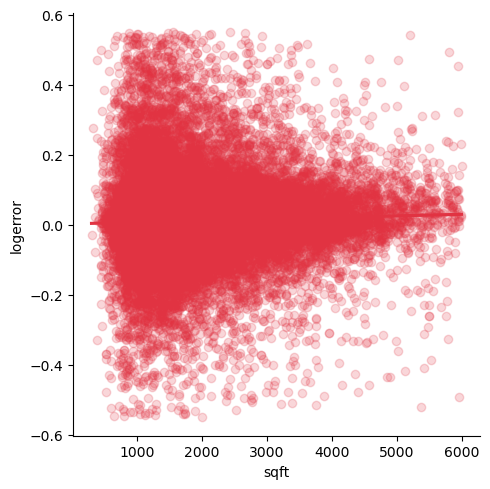

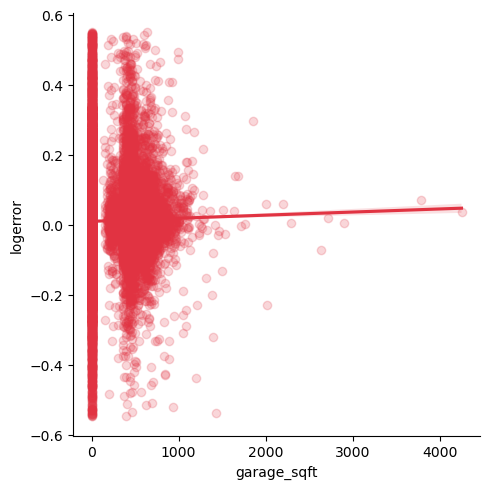

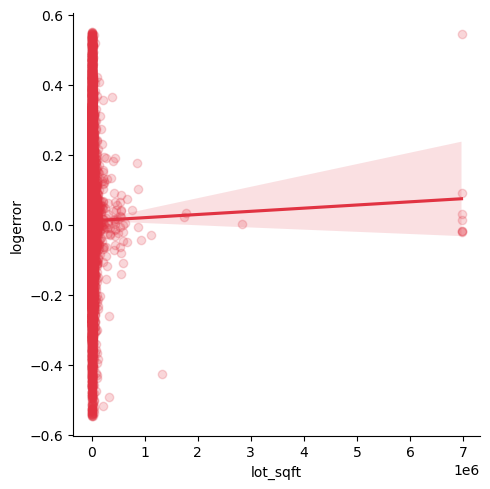

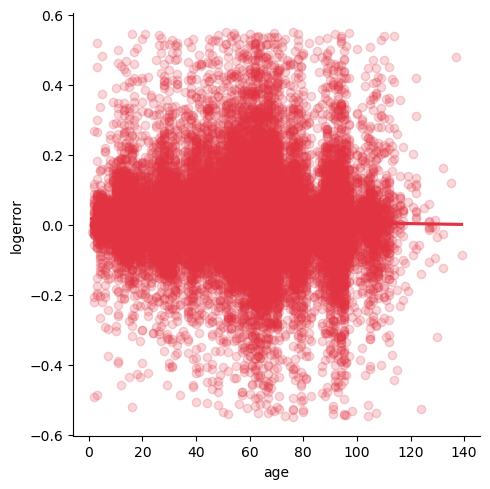

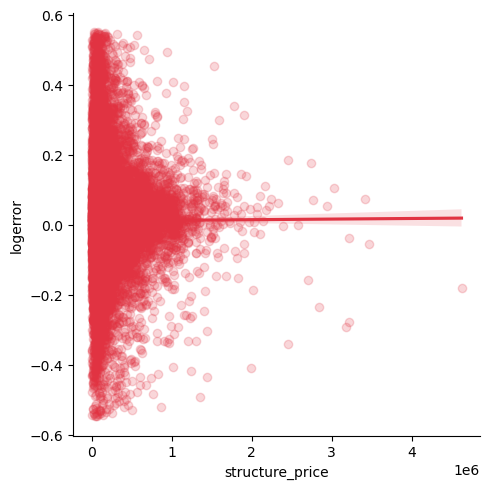

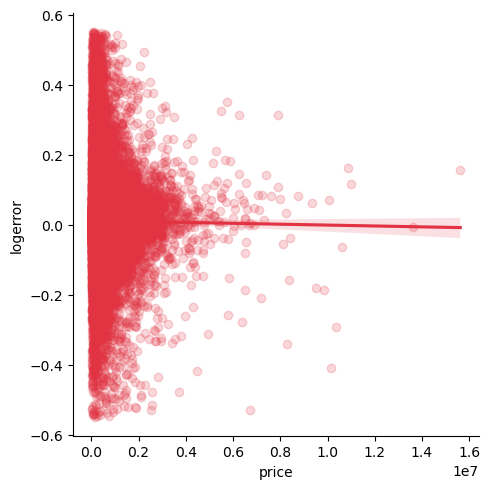

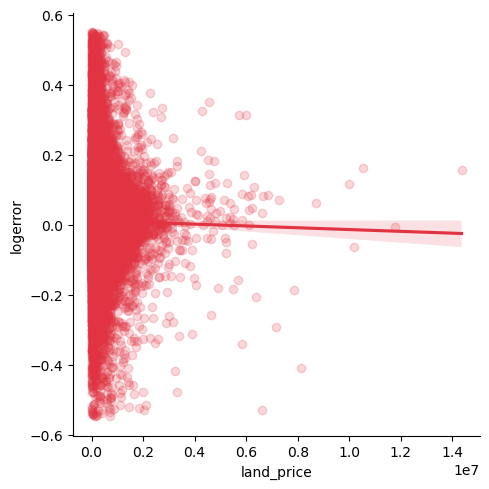

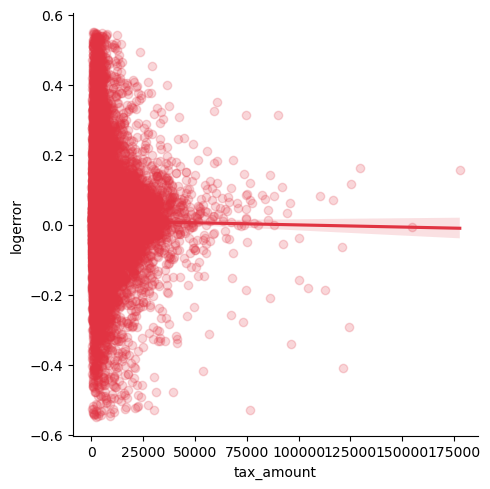

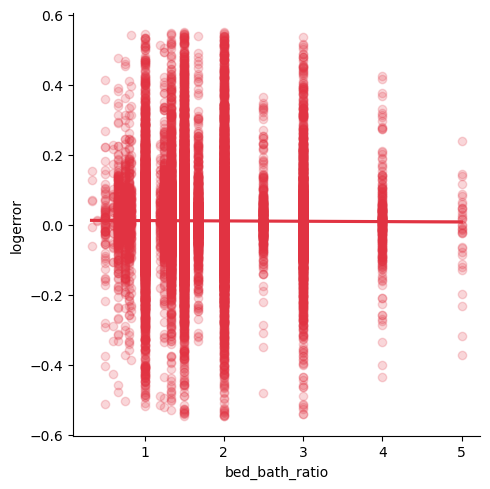

In [62]:

for i in num_variables:
    sns.lmplot(data=df, y='logerror', x =i, scatter_kws ={'alpha' : 0.2})
    plt.show()


In [10]:
df.head()

,sqft,garage_sqft,lot_sqft,age,structure_price,price,land_price,tax_amount,bed_bath_ratio,city_id,...,beds,fireplace,garage,hottub_spa,pool,unit,county_land_code,county_number,county_name,logerror
0,3100,633,4506,19,485713,1023282,537569,"11,013.720",1.330,53571,...,4,0,2,0,0,0,122,3,Orange,0.026
1,1465,0,12647,50,88000,464000,376000,"5,672.480",2.000,13091,...,2,1,1,0,0,0,1110,2,Ventura,0.056
2,1243,440,8432,55,85289,564778,479489,"6,488.300",1.500,21412,...,3,0,2,0,1,0,122,3,Orange,0.005
3,2376,0,13038,47,108918,145143,36225,"1,777.510",1.330,396551,...,4,0,0,0,1,1,101,0,LA,-0.103
4,2962,0,63000,67,276684,773303,496619,"9,516.260",1.330,47019,...,4,0,0,0,1,1,101,0,LA,-0.001


In [11]:
df.county_name.unique()

array(['Orange', 'Ventura', 'LA', 'LA_city'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49580 entries, 0 to 52318
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sqft              49580 non-null  int64  
 1   garage_sqft       49580 non-null  int64  
 2   lot_sqft          49580 non-null  int64  
 3   age               49580 non-null  int64  
 4   structure_price   49580 non-null  int64  
 5   price             49580 non-null  int64  
 6   land_price        49580 non-null  int64  
 7   tax_amount        49580 non-null  float64
 8   bed_bath_ratio    49580 non-null  float64
 9   city_id           49580 non-null  int64  
 10  zip               49580 non-null  int64  
 11  latitude          49580 non-null  int64  
 12  longitude         49580 non-null  int64  
 13  bath              49580 non-null  uint8  
 14  beds              49580 non-null  uint8  
 15  fireplace         49580 non-null  uint8  
 16  garage            49580 non-null  uint8 

In [13]:
(df['county_name'] == 'Ventura').sum()

4246

In [14]:
(df['county_name'] == 'Orange').sum()

13372

In [15]:
(df['county_name'] == 'LA').sum()

21076

In [16]:
(df['county_name'] == 'LA_city').sum()

10886

In [53]:
def county_big_viz(df):
    plt.figure(figsize=(20,10))
    big_variables= ['tax_amount','sqft','garage_sqft','lot_sqft']
    

    n =410
    for i in big_variables:
        n+=1 
        plt.subplot(n)
        custom = ['#e13342','#ffd500','#009eff','#76c6ba']
        sns.set_palette(custom)
        sns.histplot(data = df, x=i, hue='county_name', kde = True, bins= 50)#, palette='hsv_r')
    plt.subplots_adjust(hspace=.5)
        

In [58]:
def county_small_viz(df): 
    plt.figure(figsize=(20,20))
    small_variables= ['age','hottub_spa']
    
    n =220
    for i in small_variables:
        n+=1 
        plt.subplot(n)
        custom = ['#e13342','#ffd500','#009eff','#76c6ba']
        sns.set_palette(custom)
        sns.histplot(data = df, x=i, hue='county_name', kde = True,bins = 10)#, palette='hsv_r')
        #plt.subplots_adjust(hspace=.5) 
        
def county_very_small_viz(df): 
    plt.figure(figsize=(20,20))
    small_variables= ['beds','bath','lot_sqft','garage_sqft']
    
    n =220
    for i in small_variables:
        n+=1 
        plt.subplot(n)
        custom = ['#e13342','#ffd500','#009eff','#76c6ba']
        sns.set_palette(custom)
        sns.histplot(data = df, x=i, hue='county_name',bins = 4, kde = True)
        #plt.subplots_adjust(hspace=.5)         
        


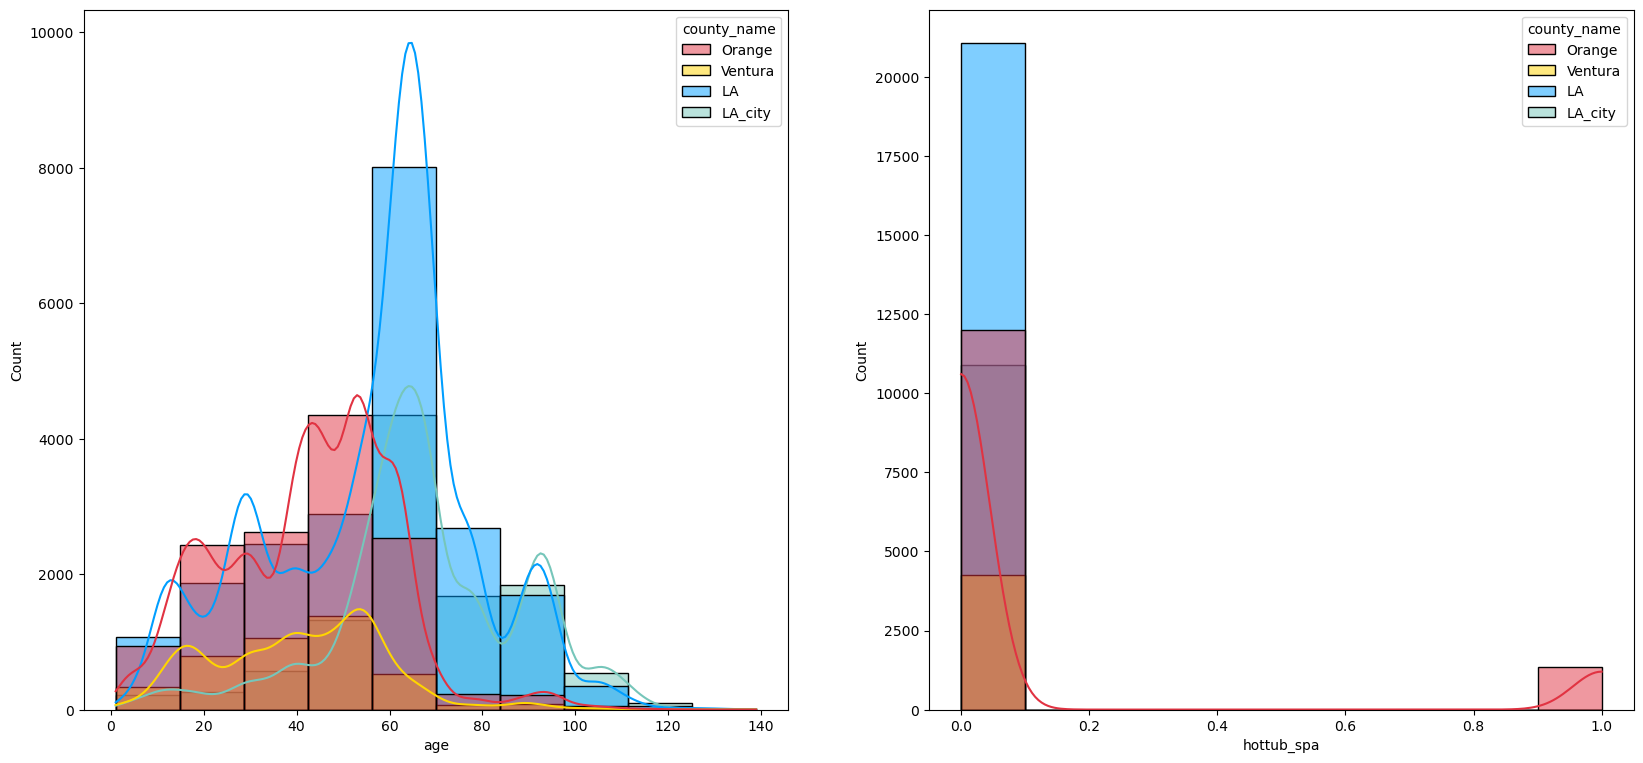

In [59]:
county_small_viz(df)

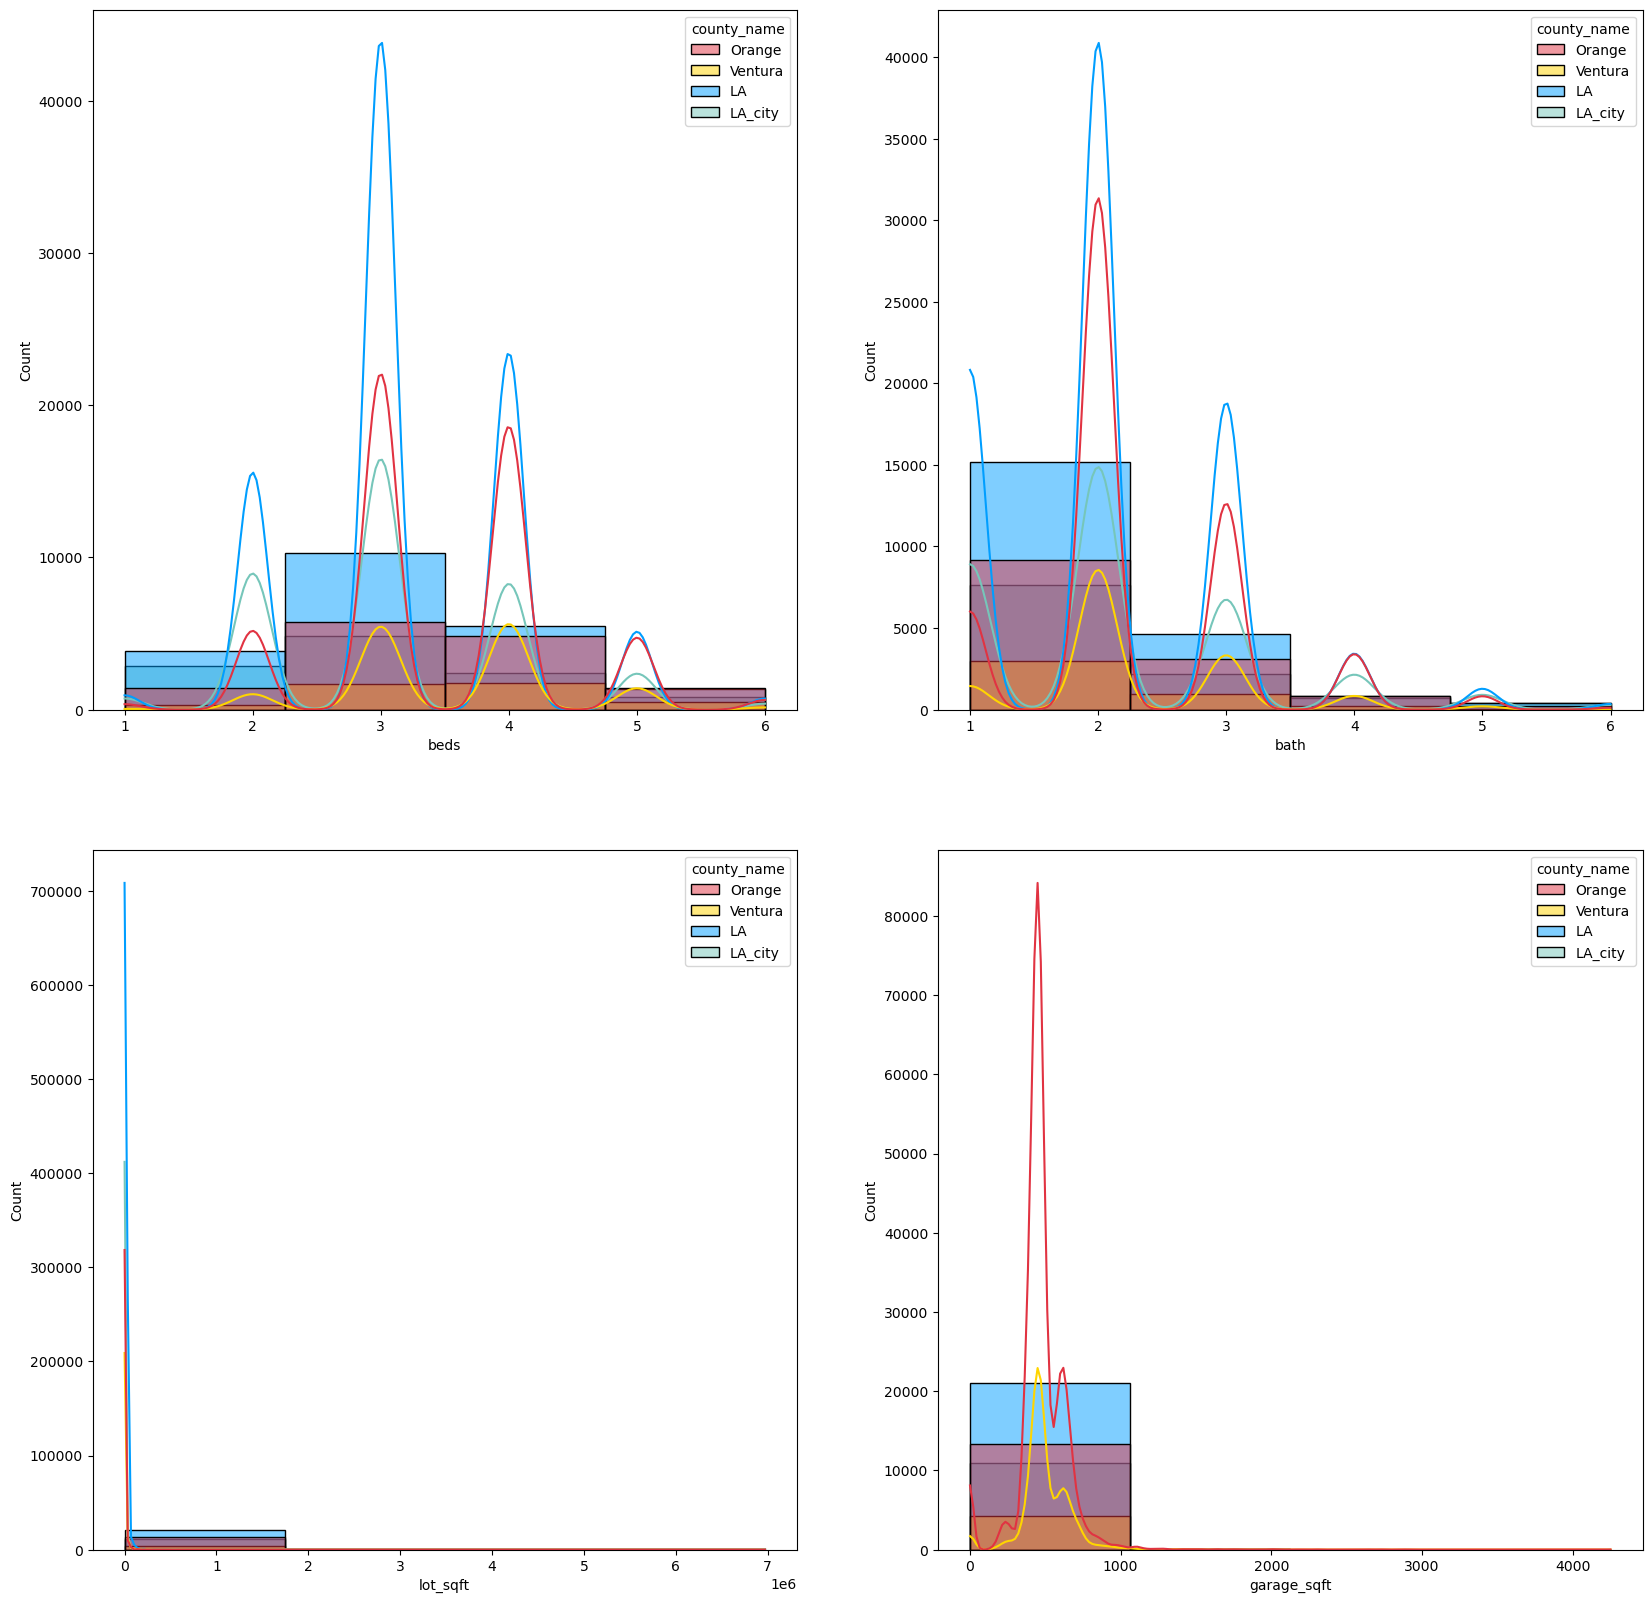

In [56]:
county_very_small_viz(df)

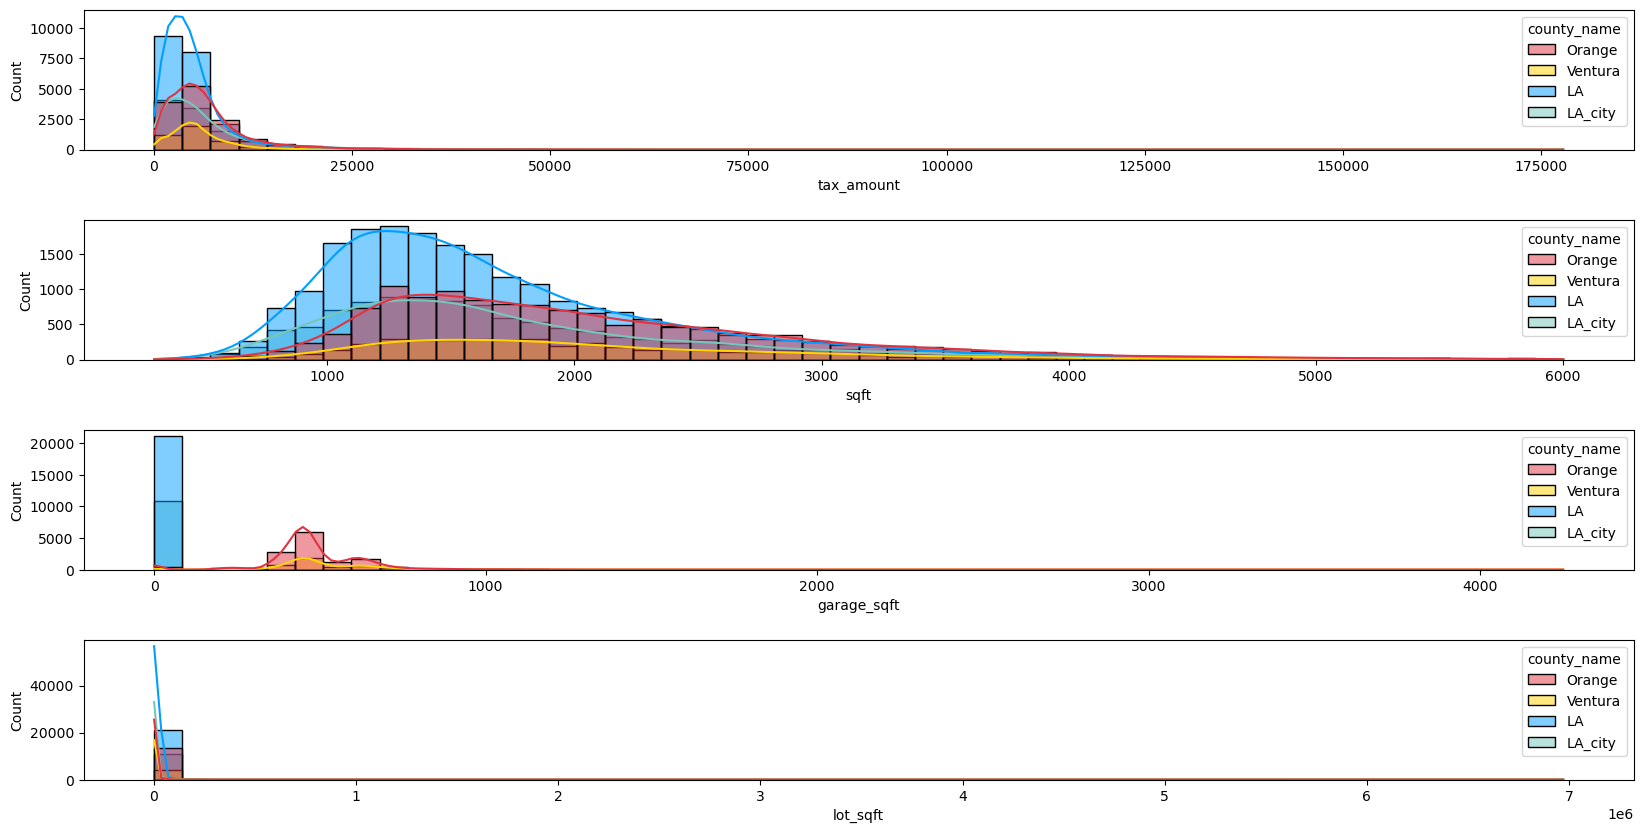

In [57]:
county_big_viz(df)

In [ ]:
color = ["green", "White", "Red", "Yellow", "Green", "Grey"]
sns.set_palette(color)
sns.palplot(sns.color_palette())


In [25]:
sns.color_palette("hsv")

[(1.0, 0.8338243632361279, 0.0),
 (0.309189485660074, 1.0, 0.0),
 (0.0, 1.0, 0.5246319661417559),
 (0.0, 0.6183848775760541, 1.0),
 (0.2154394856600736, 0.0, 1.0),
 (1.0, 0.0, 0.9275743632361277)]

In [26]:
print(sns.color_palette("hsv").as_hex())

['#ffd500', '#4fff00', '#00ff86', '#009eff', '#3700ff', '#ff00ed']


In [36]:
sns.color_palette("plasma")

[(0.32515, 0.006915, 0.639512),
 (0.546157, 0.038954, 0.64701),
 (0.723444, 0.196158, 0.538981),
 (0.85975, 0.360588, 0.406917),
 (0.95547, 0.533093, 0.28549),
 (0.994495, 0.74088, 0.166335)]

In [38]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [39]:
print(sns.color_palette("rocket").as_hex())

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']


In [27]:
sns.color_palette("BrBG")

[(0.6313725490196078, 0.3951557093425605, 0.09573241061130335),
 (0.8572856593617839, 0.7257977700884274, 0.4471357170319107),
 (0.9636293733179546, 0.9237985390234525, 0.8185313341022683),
 (0.8299115724721262, 0.9294886582083814, 0.9152633602460593),
 (0.4615916955017304, 0.7748558246828146, 0.7299500192233758),
 (0.0878892733564014, 0.479123414071511, 0.44775086505190315)]

In [28]:
print(sns.color_palette("BrBG").as_hex())

['#a16518', '#dbb972', '#f6ecd1', '#d4ede9', '#76c6ba', '#167a72']


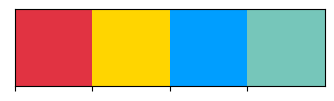

In [52]:
custom = ['#e13342','#ffd500','#009eff','#76c6ba']
sns.set_palette(custom)
sns.palplot(sns.color_palette())

<AxesSubplot:xlabel='unit', ylabel='Count'>

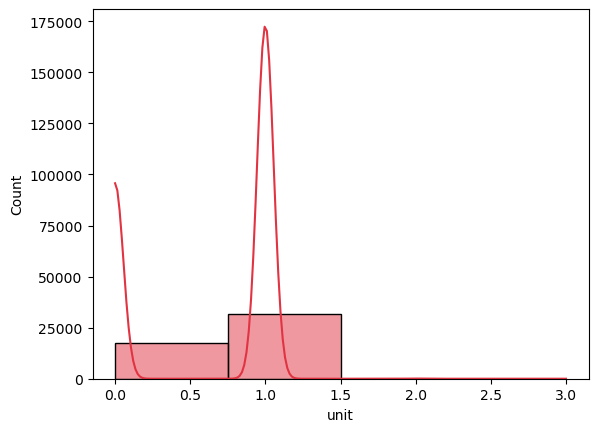

In [61]:
sns.histplot(data = df, x='unit', kde = True,bins = 4, palette='hsv_r')

In [ ]:
#df = df[(df.unitcnt != 2) | (df.unit != 3)]

In [86]:
df_size = df.shape[0]

In [73]:
df[df.unit > 1].shape[0]

18

In [75]:
df[df.unit == 2].shape[0]

17

In [76]:
df[df.unit == 3].shape[0]

1

In [85]:
df.shape[0] - (df[df.unit != 3].shape[0])

1

In [87]:
df = df[df.unit != 2]

In [89]:
df = df[df.unit != 3]

In [90]:
df_size - df.shape[0]

18

In [92]:
df.drop(columns='unit', inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49562 entries, 0 to 52318
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sqft              49562 non-null  int64  
 1   garage_sqft       49562 non-null  int64  
 2   lot_sqft          49562 non-null  int64  
 3   age               49562 non-null  int64  
 4   structure_price   49562 non-null  int64  
 5   price             49562 non-null  int64  
 6   land_price        49562 non-null  int64  
 7   tax_amount        49562 non-null  float64
 8   bed_bath_ratio    49562 non-null  float64
 9   city_id           49562 non-null  int64  
 10  zip               49562 non-null  int64  
 11  latitude          49562 non-null  int64  
 12  longitude         49562 non-null  int64  
 13  bath              49562 non-null  uint8  
 14  beds              49562 non-null  uint8  
 15  fireplace         49562 non-null  uint8  
 16  garage            49562 non-null  uint8 

In [143]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49380 entries, 0 to 52318
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sqft              49380 non-null  int64  
 1   garage_sqft       49380 non-null  int64  
 2   lot_sqft          49380 non-null  int64  
 3   age               49380 non-null  int64  
 4   structure_price   49380 non-null  int64  
 5   price             49380 non-null  int64  
 6   land_price        49380 non-null  int64  
 7   tax_amount        49380 non-null  int64  
 8   bed_bath_ratio    49380 non-null  float64
 9   city_id           49380 non-null  int64  
 10  zip               49380 non-null  int64  
 11  latitude          49380 non-null  int64  
 12  longitude         49380 non-null  int64  
 13  bath              49380 non-null  uint8  
 14  beds              49380 non-null  uint8  
 15  fireplace         49380 non-null  uint8  
 16  garage            49380 non-null  uint8 

In [96]:
df.describe()

,sqft,garage_sqft,lot_sqft,age,structure_price,price,land_price,tax_amount,bed_bath_ratio,city_id,...,longitude,bath,beds,fireplace,garage,hottub_spa,pool,county_land_code,county_number,logerror
count,"49,562.000","49,562.000","49,562.000","49,562.000","49,562.000","49,562.000","49,562.000","49,562.000","49,562.000","49,562.000",...,"49,562.000","49,562.000","49,562.000","49,562.000","49,562.000","49,562.000","49,562.000","49,562.000","49,562.000","49,562.000"
mean,"1,866.791",170.985,"10,712.488",54.014,"181,915.088","493,762.458","311,847.370","6,019.005",1.657,"33,549.125",...,"-118,193,178.328",2.194,3.284,0.169,0.673,0.027,0.215,190.229,1.200,0.011
std,849.448,249.693,"87,190.804",22.627,"186,485.795","548,056.383","413,365.095","6,309.110",0.584,"49,318.895",...,"356,191.777",0.903,0.889,0.454,0.970,0.163,0.411,282.212,1.245,0.094
min,300.000,0.000,236.000,1.000,148.000,"3,254.000",161.000,49.180,0.330,"3,491.000",...,"-119,448,392.000",1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,-0.548
25%,"1,264.000",0.000,"5,555.000",39.000,"76,558.000","191,525.500","73,675.250","2,631.690",1.330,"12,447.000",...,"-118,396,013.250",2.000,3.000,0.000,0.000,0.000,0.000,100.000,0.000,-0.025
50%,"1,644.000",0.000,"6,792.000",57.000,"129,819.000","367,561.000","215,204.000","4,578.235",1.500,"24,812.000",...,"-118,150,439.500",2.000,3.000,0.000,0.000,0.000,0.000,100.000,1.000,0.006
75%,"2,260.000",432.000,"8,640.000",67.000,"218,079.000","602,419.250","401,587.750","7,163.875",2.000,"40,227.000",...,"-117,928,987.250",3.000,4.000,0.000,2.000,0.000,0.000,122.000,3.000,0.039
max,"6,000.000","4,251.000","6,971,010.000",139.000,"4,623,607.000","15,618,488.000","14,350,903.000","177,740.850",5.000,"396,556.000",...,"-117,572,338.000",6.000,6.000,4.000,14.000,1.000,1.000,"1,112.000",3.000,0.549


In [164]:
test.describe()

,sqft,garage_sqft,lot_sqft,age,structure_price,price,land_price,tax_amount,bed_bath_ratio,city_id,...,longitude,bath,beds,fireplace,garage,hottub_spa,pool,county_land_code,county_number,logerror
count,"49,380.000","49,380.000","49,380.000","49,380.000","49,380.000","49,380.000","49,380.000","49,380.000","49,380.000","49,380.000",...,"49,380.000","49,380.000","49,380.000","49,380.000","49,380.000","49,380.000","49,380.000","49,380.000","49,380.000","49,380.000"
mean,"1,868.102",171.277,"10,710.398",54.009,"181,750.713","492,934.533","311,183.819","6,009.224",1.656,"33,538.093",...,"-118,194,109.519",2.196,3.286,0.169,0.674,0.028,0.216,190.388,1.194,0.011
std,848.515,249.809,"87,337.239",22.590,"186,051.744","547,267.150","412,708.589","6,301.927",0.584,"49,400.689",...,"356,091.447",0.902,0.888,0.454,0.971,0.164,0.411,282.429,1.243,0.094
min,300.000,0.000,236.000,1.000,148.000,"3,254.000",161.000,49.000,0.330,"3,491.000",...,"-119,448,392.000",1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,-0.548
25%,"1,266.000",0.000,"5,558.000",39.000,"76,616.750","191,345.750","73,500.000","2,629.750",1.330,"12,447.000",...,"-118,396,779.250",2.000,3.000,0.000,0.000,0.000,0.000,100.000,0.000,-0.025
50%,"1,645.000",0.000,"6,792.000",57.000,"129,869.000","367,050.500","214,989.500","4,574.000",1.500,"24,812.000",...,"-118,151,814.000",2.000,3.000,0.000,0.000,0.000,0.000,100.000,1.000,0.006
75%,"2,260.000",432.000,"8,640.000",67.000,"218,002.500","601,000.000","400,771.000","7,153.000",2.000,"40,227.000",...,"-117,930,403.000",3.000,4.000,0.000,2.000,0.000,0.000,122.000,3.000,0.039
max,"6,000.000","4,251.000","6,971,010.000",139.000,"4,623,607.000","15,618,488.000","14,350,903.000","177,740.000",5.000,"396,556.000",...,"-117,572,338.000",6.000,6.000,4.000,14.000,1.000,1.000,"1,112.000",3.000,0.549


In [145]:
test.logerror

0        0
1        0
2        0
3        0
4        0
        ..
52314    0
52315    0
52316    0
52317    0
52318    0
Name: logerror, Length: 49380, dtype: int64